In [ ]:
#Downloads stock data from sp500 index, cleans and vizualizes it, set up machine learning target and created initial model
#Found errors and backtested, attempted to improve model by changing predictors

In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
#Creating a query of the historical prices of sp
sp500 = sp500.history(period = "max")

In [6]:
#Visual of sp500 dataframe
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,0.0,0.0
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,0.0,0.0
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,0.0,0.0


<Axes: xlabel='Date'>

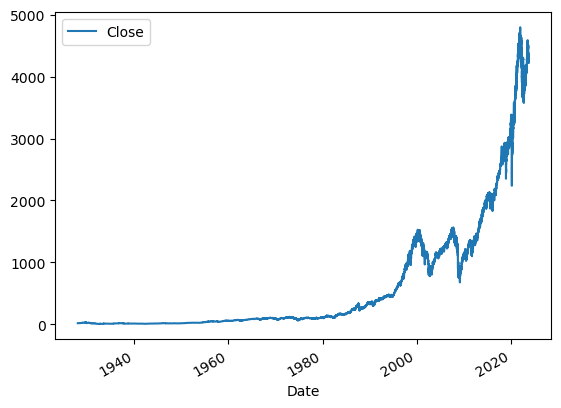

In [7]:
#Showing the date and the closing price
sp500.plot.line(y = "Close", use_index = True)

In [8]:
#Removing unwanted columns
del sp500["Dividends"]
del sp500["Stock Splits"]

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,4373.200195
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,4314.600098
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4278.000000


In [10]:
#Creating a boolean as an integer telling if tomorrow the price will go up
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,4373.200195,0
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,4314.600098,0
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4278.000000,0


In [12]:
#Don't want data that is too old, changing to only be from this century
sp500 = sp500.loc["2000-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1
...,...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,4373.200195,0
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,4314.600098,0
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4278.000000,0


In [13]:
#Creating RandomForest data model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300, min_samples_split = 100, random_state = 1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
#Chosing what will be used to predict target
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=300, random_state=1)

In [14]:
#What percentage of the time when it was predicted to go up did the price actually go up
from sklearn.metrics import precision_score
import pandas as pd
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
preds

Date
2023-05-31 00:00:00-04:00    0
2023-06-01 00:00:00-04:00    0
2023-06-02 00:00:00-04:00    1
2023-06-05 00:00:00-04:00    1
2023-06-06 00:00:00-04:00    1
                            ..
2023-10-16 00:00:00-04:00    0
2023-10-17 00:00:00-04:00    1
2023-10-18 00:00:00-04:00    1
2023-10-19 00:00:00-04:00    1
2023-10-20 00:00:00-04:00    1
Length: 100, dtype: int32

In [15]:
precision_score(test["Target"], preds)

0.5

<Axes: xlabel='Date'>

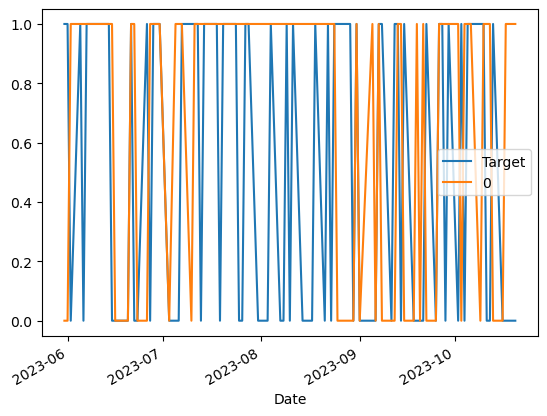

In [16]:
#It's a coin flip, model does not help at all
combined = pd.concat([test["Target"], preds], axis = 1)
#Shows us what happened vs prediction
combined.plot()

In [17]:
#Function that does previous work all at once
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [20]:
#Creating backtesting model, first time use at least 10 years worth of data
def backtest(data, model, predictors, start = 2500, step = 250):
    preds = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions = predict(train, test, predictors, model)
        preds.append(predictions)
    return pd.concat(preds)

In [21]:
predictions = backtest(sp500, model, predictors)

In [22]:
#Seeing how often each prediction was made
predictions["Predictions"].value_counts()

Predictions
1    1833
0    1656
Name: count, dtype: int64

In [23]:
#Checking precision again
precision_score(predictions["Target"], predictions["Predictions"])

0.5259138025095472

In [24]:
#Compare how often it was predicted price would go up vs how often it actaully did
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.541702
0    0.458298
Name: count, dtype: float64

In [25]:
#Off by about 1.5%, want to improve

In [28]:
#Creating a list of a certain amount of trading days (2 days to 4 years)
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

#On any given day, check the sums of the last certain amount of days' targets
for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    ratio_col = f"Close_Ratio_{horizon}"
    sp500[ratio_col] = sp500["Close"] / rolling_average["Close"]
    trend_col = f"Trend_{horizon}"
    sp500[trend_col] = sp500.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_col, trend_col]

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,931800000,1399.420044,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000,1402.109985,1,0.980453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000,1403.449951,1,1.000960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000,1441.469971,1,1.000478,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000,1457.599976,1,1.013364,2.0,1.014881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,4373.200195,0,1.005269,1.0,1.003761,3.0,0.988135,29.0,1.051918,126.0,1.121201,531.0
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,4314.600098,0,0.999951,1.0,1.002974,2.0,0.988713,28.0,1.051154,125.0,1.120703,530.0
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4278.000000,0,0.993255,0.0,0.992372,1.0,0.976395,27.0,1.036452,125.0,1.105324,529.0


In [30]:
#Getting rid of missing rows
sp500 = sp500.dropna()

In [31]:
#Rewriting model and predict function
model = RandomForestClassifier(n_estimators = 500, min_samples_split = 50, random_state = 1)

In [32]:
#Want to change to what is the probability the stock goes up or down
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    #Model must be 60% confident to say price will go up
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [33]:
predictions = backtest(sp500, model, new_predictors)

In [34]:
#Looking at value counts again
predictions["Predictions"].value_counts()

Predictions
0.0    2059
1.0     429
Name: count, dtype: int64

In [35]:
#Checking when the model predicts an increase, how often it actaully increases
precision_score(predictions["Target"], predictions["Predictions"])

0.5174825174825175